<a href="https://colab.research.google.com/github/adamalavi/SHALA2020/blob/master/Assignment_ML_LinearModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Regression(SGD)**



---
Importing the required packages


---



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import california_housing
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns;
import random



---
Using the same dataset **california_housing** try to find the best fit of the dataset by implementing stocastic gradient descent from scratch. 


---



In [0]:
housing_data = california_housing.fetch_california_housing()

In [590]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)
print(df)

       MedInc  HouseAge  AveRooms  ...  Latitude  Longitude  Target
0      8.3252      41.0  6.984127  ...     37.88    -122.23   4.526
1      8.3014      21.0  6.238137  ...     37.86    -122.22   3.585
2      7.2574      52.0  8.288136  ...     37.85    -122.24   3.521
3      5.6431      52.0  5.817352  ...     37.85    -122.25   3.413
4      3.8462      52.0  6.281853  ...     37.85    -122.25   3.422
...       ...       ...       ...  ...       ...        ...     ...
20635  1.5603      25.0  5.045455  ...     39.48    -121.09   0.781
20636  2.5568      18.0  6.114035  ...     39.49    -121.21   0.771
20637  1.7000      17.0  5.205543  ...     39.43    -121.22   0.923
20638  1.8672      18.0  5.329513  ...     39.43    -121.32   0.847
20639  2.3886      16.0  5.254717  ...     39.37    -121.24   0.894

[20640 rows x 9 columns]


In [0]:
df = df[df.Target < 5]

In [0]:
X = df.MedInc
y = df.Target

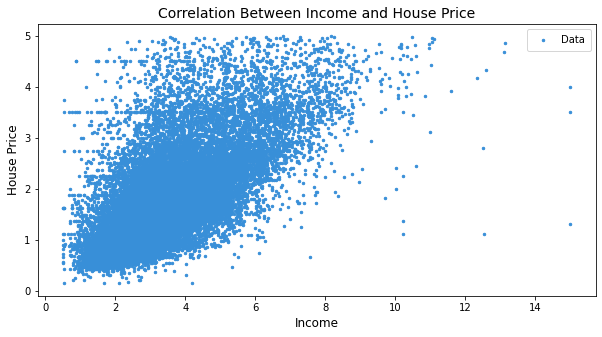

In [593]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

In [0]:
def SGD(X,y,batch_size,lr = 0.01,epochs=100):
  ################################################
  ####write your code here######################## 
  #################################################
  m, b = 0.0, 0.0# initial parameters
  mse = [] # lists to store learning process

  
  for _ in range(epochs):
      
      indexes = np.random.randint(0, len(X), batch_size) # random sample
      
      Xs = np.take(X, indexes)
      ys = np.take(y, indexes)
      N = len(Xs)
      
      f = ys - (m*Xs + b)
      
      # Updating parameters m and b
      m -= lr * (-2 * Xs.dot(f).sum() / N)
      b -= lr * (-2 * f.sum() / N)
      
      mse.append(mean_squared_error(y, m*X+b)) 
  return m, b, mse

In [595]:
m, b, mse = SGD(X, y, lr=0.01, epochs=100, batch_size=10)
y_pred = m*X + b
print("MSE:{}".format(mean_squared_error(y, y_pred)))
print("slope:{}".format(m))
print("intercept:{}".format(b))

MSE:0.5637002099452034
slope:0.44935108129237084
intercept:0.1733472698247164


Plot the SGD curve(MSE against the epochs), and the line which represents the best fit of the given dataset.

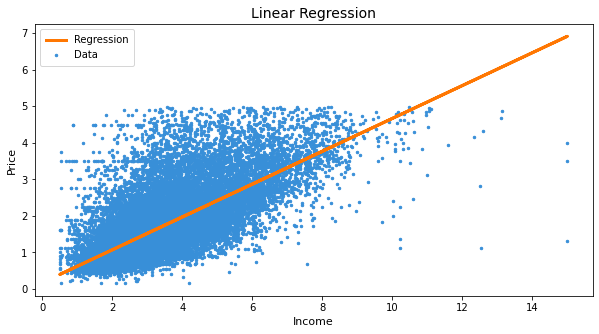

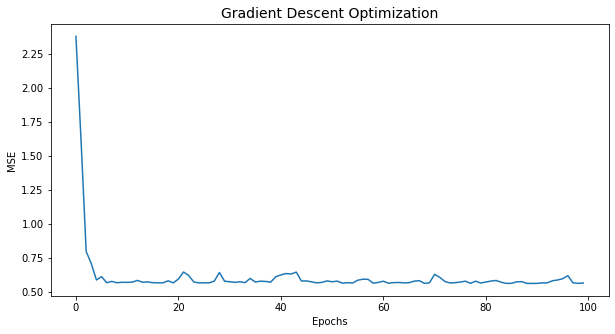

In [596]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
plt.title('Linear Regression', fontSize=14)
plt.xlabel('Income', fontSize=11)
plt.ylabel('Price', fontSize=11)
plt.legend( loc=0, fontsize=10, borderpad=.6)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(range(len(mse)), mse)
plt.title('Gradient Descent Optimization', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()
################################################
###########write your code#####################
###############################################

#**SVM**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA



---


**Generating Random linearly separable data**


---



In [0]:
np.random.seed(7)
data = [[np.random.rand(), np.random.rand()] for i in range(10)]
for i, point in enumerate(data):
  x, y = point
  if 0.5*x - y + 0.25 > 0:
    data[i].append(-1)
  else:
    data[i].append(1)



---


**Visualizing the above data**


---



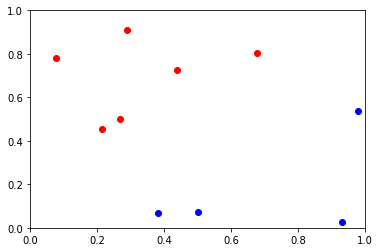

In [599]:
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(0,1)
  plt.ylim(0,1)



---


**Train a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples. You can refer to Fig. 1 in [this](https://www.cs.huji.ac.il/~shais/papers/ShalevSiSrCo10.pdf) paper for implementation. You can add arguments to svm_function according to your implementation.**


---



In [0]:
def svm_function(x, y, epochs, l_rate):
    ###################################
    ### Write your code here###########
    ###################################
    w = np.zeros(len(X[0]))
    eta = 1
    for epoch in range(1,epochs):
        eta = 1/(l_rate*epoch)
        for i, x in enumerate(X):
            if (Y[i]*np.dot(X[i], w)) < 1:
                w = w + eta * ( (X[i] * Y[i]) - (l_rate* w))
            else:
                w = w - eta * (l_rate* w)
    return w



---


**Run SVM Classifier**


---



In [601]:
data = np.asarray(data)
X_temp = data[:,:2]
Y = data[:,2] 
X = np.ones((X_temp.shape[0],X_temp.shape[1]+1))
X[:,:-1] = X_temp
w = svm_function(X, Y, 10000, 0.01)
print(w)

[-3.0468159   3.8624519  -0.09567808]


# **Visualize the classifier**


---

Write a code to draw a lines corrosponding to 'w' vector you got as output from svm_function and for a line from which actual data was generated (0.5*x - y + 0.25). 

---



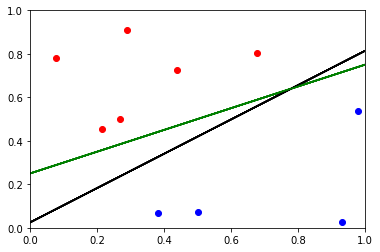

In [619]:
###################################
### Write your code here###########
###################################
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  x1 = np.linspace(-5,5,100)
  y1 = (-w[0]*x1-w[2])/w[1]
  plt.plot(x1, y1, c='black', label="SVM boundary")
  x2 = np.linspace(-5,5,100)
  y2 = 0.5*x2 + 0.25
  plt.plot(x2, y2, c='green', label="Actual")
  plt.xlim(0,1)
  plt.ylim(0,1)